Import Library

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
%config InlineBackend.figure_format = 'retina'

import urllib.request
import zipfile
import random
import itertools
import math
import plotly.graph_objects as go

import pyarrow.parquet as pq


In [66]:
df = pd.read_csv('/content/drive/MyDrive/Anggaran/etcetera/Bootcamp/DSLS Data Science Learning Studio/Mini Project/Dataset/Prod & Shipment MPDE.csv')
df.head()

,ProductName,salesorder,Month,YEAR,Discount,CategoryName,ShipCountry,ShipCity,CompanyName
0,Alice Mutton,"1287,00",12,1997,0,Meat/Poultry,Austria,Graz,Ernst Handel
1,Alice Mutton,"1365,00",12,1997,"0,25",Meat/Poultry,Austria,Graz,Ernst Handel
2,Alice Mutton,"1560,00",12,1997,"0,25",Meat/Poultry,Spain,Madrid,Bólido Comidas preparadas
3,Aniseed Syrup,"200,00",12,1997,"0,1",Condiments,Austria,Graz,Ernst Handel
4,Boston Crab Meat,"18,40",12,1997,0,Seafood,Italy,Torino,Franchi S.p.A.


In [68]:
df['sales_order'] = [float(i.replace(",","")) for i in df.salesorder]
df['sales_order1'] = df['sales_order'] / 100
df.head(20)

,ProductName,salesorder,Month,YEAR,Discount,CategoryName,ShipCountry,ShipCity,CompanyName,sales_order,sales_order1
0,Alice Mutton,"1287,00",12,1997,0,Meat/Poultry,Austria,Graz,Ernst Handel,128700.0,1287.0
1,Alice Mutton,"1365,00",12,1997,"0,25",Meat/Poultry,Austria,Graz,Ernst Handel,136500.0,1365.0
2,Alice Mutton,"1560,00",12,1997,"0,25",Meat/Poultry,Spain,Madrid,Bólido Comidas preparadas,156000.0,1560.0
3,Aniseed Syrup,"200,00",12,1997,"0,1",Condiments,Austria,Graz,Ernst Handel,20000.0,200.0
4,Boston Crab Meat,"18,40",12,1997,0,Seafood,Italy,Torino,Franchi S.p.A.,1840.0,18.4
5,Camembert Pierrot,"408,00",12,1996,0,Dairy Products,Sweden,Luleå,Berglunds snabbköp,40800.0,408.0
6,Camembert Pierrot,"163,20",12,1996,"0,1",Dairy Products,Ireland,Cork,Hungry Owl All-Night Grocers,16320.0,163.2
7,Camembert Pierrot,"544,00",12,1996,"0,2",Dairy Products,USA,Lander,Split Rail Beer & Ale,54400.0,544.0
8,Camembert Pierrot,"1904,00",12,1996,"0,25",Dairy Products,Brazil,Sao Paulo,Queen Cozinha,190400.0,1904.0
9,Camembert Pierrot,"510,00",12,1997,0,Dairy Products,UK,Colchester,Around the Horn,51000.0,510.0


In [49]:
df.to_csv('sales_order1', index = False)

In [69]:
df_cust = df[['ProductName', 'sales_order1', 'Month', 'Discount', 'CategoryName', 'ShipCountry', 'ShipCity', 'CompanyName' ]]
df_cust.head()

,ProductName,sales_order1,Month,Discount,CategoryName,ShipCountry,ShipCity,CompanyName
0,Alice Mutton,1287.0,12,0,Meat/Poultry,Austria,Graz,Ernst Handel
1,Alice Mutton,1365.0,12,"0,25",Meat/Poultry,Austria,Graz,Ernst Handel
2,Alice Mutton,1560.0,12,"0,25",Meat/Poultry,Spain,Madrid,Bólido Comidas preparadas
3,Aniseed Syrup,200.0,12,"0,1",Condiments,Austria,Graz,Ernst Handel
4,Boston Crab Meat,18.4,12,0,Seafood,Italy,Torino,Franchi S.p.A.


In [50]:
yearly_data = df.groupby("YEAR")
annual_sales=df.groupby('YEAR')['sales_order1'].sum()
annual_sales['sales_order1']=df.salesorder.cumsum()
annual_sales

YEAR
1996                                                     226298.5
1997                                                    658388.75
1998                                                    469771.34
sales_order1    0                                             ...
Name: sales_order1, dtype: object

In [51]:
layout = go.Layout(title='Annual Sales')
xaxis_title = 'year',
yaxis_title = 'sales order',
height=580,
width=900,
font_size=14

fig = go.Figure(layout=layout)
fig.add_traces(data=go.Bar(x=df.YEAR, y=df.sales_order1, marker=dict(color='black', line=dict(color='black', width=1.2)),
                           opacity=.9, hovertemplate='<br>'.join(['Year=%{x}', 'TotalSales=%{y}']), name='Sales Distribution'))

fig.show()

In [52]:
df.ProductName.unique()

array(['Alice Mutton', 'Aniseed Syrup', 'Boston Crab Meat',
       'Camembert Pierrot', 'Carnarvon Tigers', 'Chai', 'Chang',
       'Chartreuse verte', "Chef Anton's Gumbo Mix", 'Côte de Blaye',
       'Escargots de Bourgogne', 'Filo Mix', 'Flotemysost', 'Geitost',
       'Gnocchi di nonna Alice', 'Gorgonzola Telino',
       'Guaraná Fantástica', 'Gudbrandsdalsost', 'Gula Malacca',
       'Gumbär Gummibärchen', "Gustaf's Knäckebröd", 'Ikura',
       'Inlagd Sill', 'Ipoh Coffee', "Jack's New England Clam Chowder",
       'Konbu', 'Lakkalikööri', 'Laughing Lumberjack Lager',
       'Longlife Tofu', 'Louisiana Fiery Hot Pepper Sauce',
       'Louisiana Hot Spiced Okra', 'Manjimup Dried Apples', 'Maxilaku',
       'Mozzarella di Giovanni', 'Nord-Ost Matjeshering',
       'Northwoods Cranberry Sauce', 'NuNuCa Nuß-Nougat-Creme',
       'Original Frankfurter grüne Soße', 'Outback Lager', 'Pâté chinois',
       'Pavlova', 'Perth Pasties', 'Queso Cabrales',
       'Raclette Courdavault', 'Rhönb

Melakukan Top Ranked dari 5 produk paling laris sepanjang tahun dan didapatkan hasil berikut

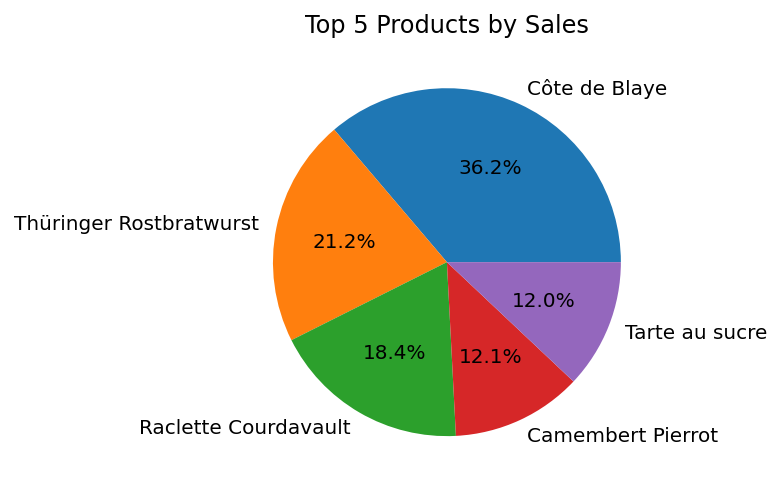

In [9]:
groupedbyname_df = df.groupby('ProductName').sum()
sortedbysales_df = groupedbyname_df.sort_values(by='sales_order1', ascending=False)
top_5_products = sortedbysales_df.head(5)
plt.pie(top_5_products['sales_order1'], labels=top_5_products.index, autopct='%1.1f%%')
plt.title('Top 5 Products by Sales')
plt.show()

# Share of Product Sales year by year

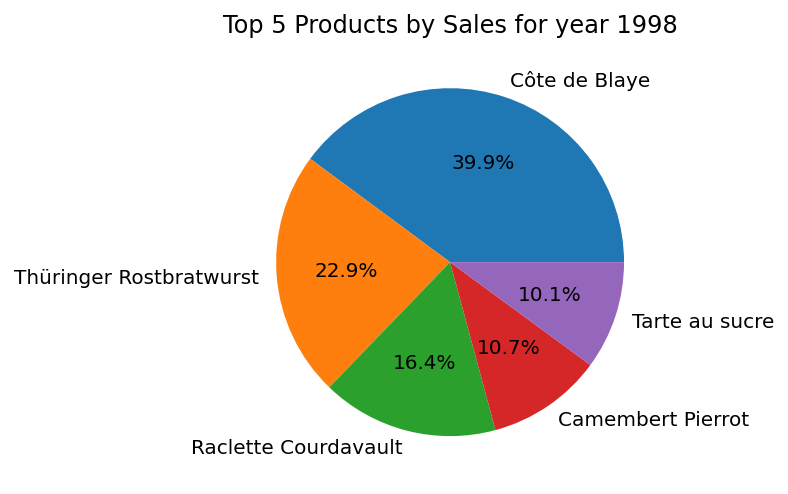

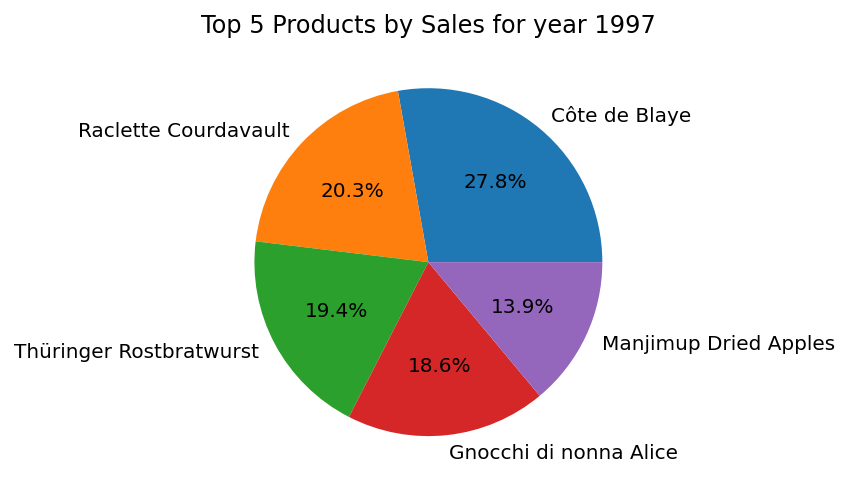

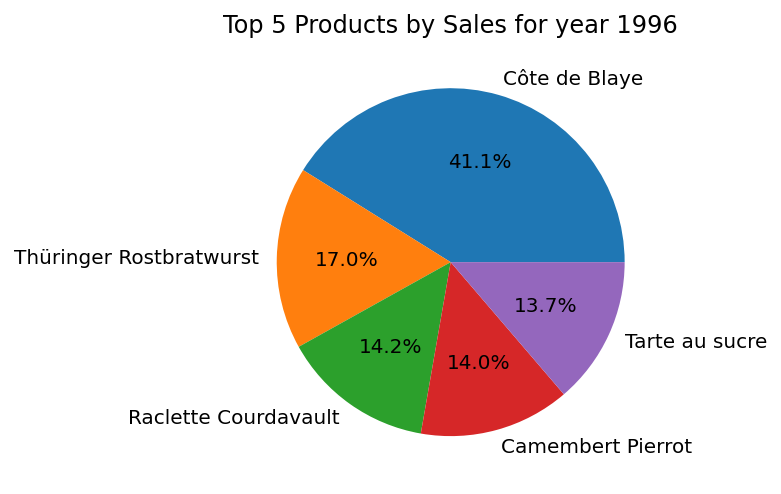

In [10]:
groupedbynameyear_df = df.groupby(['ProductName','YEAR']).sum()
sortedbysalesyear_df = groupedbynameyear_df.sort_values(by='sales_order1', ascending=False)
top_5_products_year = sortedbysalesyear_df.reset_index().groupby('YEAR').head(5)

for year in top_5_products_year['YEAR'].unique():
  year_df = top_5_products_year[top_5_products_year['YEAR'] == year]
  plt.pie(year_df['sales_order1'], labels=year_df['ProductName'], autopct='%1.1f%%')
  plt.title(f'Top 5 Products by Sales for year {year}')
  plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductName   2147 non-null   object 
 1   salesorder    2147 non-null   object 
 2   Month         2147 non-null   int64  
 3   YEAR          2147 non-null   int64  
 4   Discount      2147 non-null   object 
 5   CategoryName  2147 non-null   object 
 6   ShipCountry   2147 non-null   object 
 7   ShipCity      2147 non-null   object 
 8   CompanyName   2147 non-null   object 
 9   sales_order   2147 non-null   float64
 10  sales_order1  2147 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 184.6+ KB


In [12]:
df.CategoryName.unique()

array(['Meat/Poultry', 'Condiments', 'Seafood', 'Dairy Products',
       'Beverages', 'Grains/Cereals', 'Confections', 'Produce'],
      dtype=object)

In [13]:
df.ShipCity.unique()

array(['Graz', 'Madrid', 'Torino', 'Luleå', 'Cork', 'Lander', 'Sao Paulo',
       'Colchester', 'Lille', 'Bern', 'Boise', 'Köln', 'Warszawa',
       'Toulouse', 'Lyon', 'London', 'Bräcke', 'Bergamo',
       'Rio de Janeiro', 'Portland', 'Århus', 'München', 'Stavern',
       'Campinas', 'Oulu', 'Montréal', 'Buenos Aires', 'Brandenburg',
       'Salzburg', 'San Cristóbal', 'Tsawassen', 'Butte', 'Caracas',
       'Bruxelles', 'Aachen', 'Elgin', 'Barquisimeto', 'Cunewalde',
       'Lisboa', 'Kobenhavn', 'Cowes', 'Resende', 'Albuquerque',
       'Leipzig', 'Frankfurt a.M.', 'Charleroi', 'Reggio Emilia',
       'México D.F.', 'Stuttgart', 'I. de Margarita', 'Seattle',
       'Strasbourg', 'Reims', 'Genève', 'Marseille', 'Barcelona',
       'San Francisco', 'Paris', 'Anchorage', 'Berlin', 'Helsinki',
       'Sevilla', 'Nantes', 'Eugene', 'Vancouver', 'Mannheim', 'Münster',
       'Kirkland', 'Walla Walla', 'Versailles'], dtype=object)

Data Prparation

In [98]:
df_cust_copy = df_cust.copy()


In [99]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df_cust = df_cust.apply(le.fit_transform)
df_cust.head()

,index,ProductName,sales_order1,Month,Discount,CategoryName,ShipCountry,ShipCity,CompanyName
0,0,0,686,11,0,5,1,25,20
1,1,0,697,11,10,5,1,25,20
2,2,0,723,11,10,5,15,38,10
3,3,1,252,11,7,1,1,25,20
4,4,2,12,11,0,7,10,62,25


In [100]:
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [101]:
from kmodes.kmodes import KModes

Klaster dibagi menjadi 8 berdasarkan kategori produk dengan metode inisialisasi Cao untuk cantroid data kategorikal.

n_init menggambarkan berapa kali algoritma dirunning dengan centroid seed yang berbeda sedangkan verbose menggambarkan tingkat verbositas output

In [102]:
km_cao = KModes(n_clusters=8, init = "Cao", n_init=3, verbose=3)
fitClusters_cao = km_cao.fit_predict(df_cust)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 55, cost: 14088.0
Run 1, iteration: 2/100, moves: 6, cost: 14088.0


Klaster Prediksi

In [103]:
fitClusters_cao

array([2, 2, 0, ..., 1, 2, 2], dtype=uint16)

In [104]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df_cust.columns

In [105]:
clusterCentroidsDf

,index,ProductName,sales_order1,Month,Discount,CategoryName,ShipCountry,ShipCity,CompanyName
0,2,21,123,2,0,0,19,8,69
1,5,3,294,3,0,3,8,20,59
2,0,62,405,0,0,2,1,25,20
3,4,30,286,1,0,7,3,52,34
4,7,14,300,0,0,3,19,1,63
5,14,31,230,0,0,0,8,9,38
6,68,27,493,3,0,7,19,57,86
7,121,67,471,2,0,2,8,44,77


In [106]:
cost = []
for num_clusters in list(range(1,5)):
  kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
  kmode.fit_predict(df_cust)
  cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 16690.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 22, cost: 15756.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 19, cost: 15170.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 22, cost: 14728.0


In [107]:
km_cao = KModes(n_clusters=8, init = "Cao", n_init=3, verbose=3)
fitClusters_cao = km_cao.fit_predict(df_cust)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 55, cost: 14088.0
Run 1, iteration: 2/100, moves: 6, cost: 14088.0


In [108]:
fitClusters_cao

array([2, 2, 0, ..., 1, 2, 2], dtype=uint16)

In [109]:
df_cluster = df_cust

Menggabungkan klaster prediksi dengan data asli

In [112]:
df_cust = df_cust_copy.reset_index()

In [113]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df_cust, clustersDf], axis = 1).reset_index()

ValueError: ignored

In [83]:
combinedDf.head()

,level_0,index,ProductName,sales_order1,Month,Discount,CategoryName,ShipCountry,ShipCity,CompanyName,cluster_predicted
0,0,0,Alice Mutton,1287.0,12,0,Meat/Poultry,Austria,Graz,Ernst Handel,2
1,1,1,Alice Mutton,1365.0,12,"0,25",Meat/Poultry,Austria,Graz,Ernst Handel,2
2,2,2,Alice Mutton,1560.0,12,"0,25",Meat/Poultry,Spain,Madrid,Bólido Comidas preparadas,7
3,3,3,Aniseed Syrup,200.0,12,"0,1",Condiments,Austria,Graz,Ernst Handel,2
4,4,4,Boston Crab Meat,18.4,12,0,Seafood,Italy,Torino,Franchi S.p.A.,3


In [114]:
combinedDf = combinedDf.drop(['index','level_0'], axis = 1)

KeyError: ignored

Cluster Identification

In [86]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_3 = combinedDf[combinedDf['cluster_predicted'] == 3]
cluster_4 = combinedDf[combinedDf['cluster_predicted'] == 4]
cluster_5 = combinedDf[combinedDf['cluster_predicted'] == 5]
cluster_6 = combinedDf[combinedDf['cluster_predicted'] == 6]
cluster_7 = combinedDf[combinedDf['cluster_predicted'] == 7]
cluster_8 = combinedDf[combinedDf['cluster_predicted'] == 8]

In [87]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 12 to 2121
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductName        601 non-null    object 
 1   sales_order1       601 non-null    float64
 2   Month              601 non-null    int64  
 3   Discount           601 non-null    object 
 4   CategoryName       601 non-null    object 
 5   ShipCountry        601 non-null    object 
 6   ShipCity           601 non-null    object 
 7   CompanyName        601 non-null    object 
 8   cluster_predicted  601 non-null    uint16 
dtypes: float64(1), int64(1), object(6), uint16(1)
memory usage: 43.4+ KB


In [88]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 5 to 2144
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductName        450 non-null    object 
 1   sales_order1       450 non-null    float64
 2   Month              450 non-null    int64  
 3   Discount           450 non-null    object 
 4   CategoryName       450 non-null    object 
 5   ShipCountry        450 non-null    object 
 6   ShipCity           450 non-null    object 
 7   CompanyName        450 non-null    object 
 8   cluster_predicted  450 non-null    uint16 
dtypes: float64(1), int64(1), object(6), uint16(1)
memory usage: 32.5+ KB


In [93]:
combinedDf

,ProductName,sales_order1,Month,Discount,CategoryName,ShipCountry,ShipCity,CompanyName,cluster_predicted
0,Alice Mutton,1287.0,12,0,Meat/Poultry,Austria,Graz,Ernst Handel,2
1,Alice Mutton,1365.0,12,"0,25",Meat/Poultry,Austria,Graz,Ernst Handel,2
2,Alice Mutton,1560.0,12,"0,25",Meat/Poultry,Spain,Madrid,Bólido Comidas preparadas,7
3,Aniseed Syrup,200.0,12,"0,1",Condiments,Austria,Graz,Ernst Handel,2
4,Boston Crab Meat,18.4,12,0,Seafood,Italy,Torino,Franchi S.p.A.,3
...,...,...,...,...,...,...,...,...,...
2142,Wimmers gute Semmelknödel,1596.0,1,0,Grains/Cereals,Germany,Cunewalde,QUICK-Stop,1
2143,Wimmers gute Semmelknödel,997.5,1,"0,25",Grains/Cereals,Germany,München,Frankenversand,5
2144,Zaanse koeken,418.0,1,0,Confections,Germany,Cunewalde,QUICK-Stop,1
2145,Zaanse koeken,228.0,1,"0,25",Confections,Canada,Tsawassen,Bottom-Dollar Markets,2


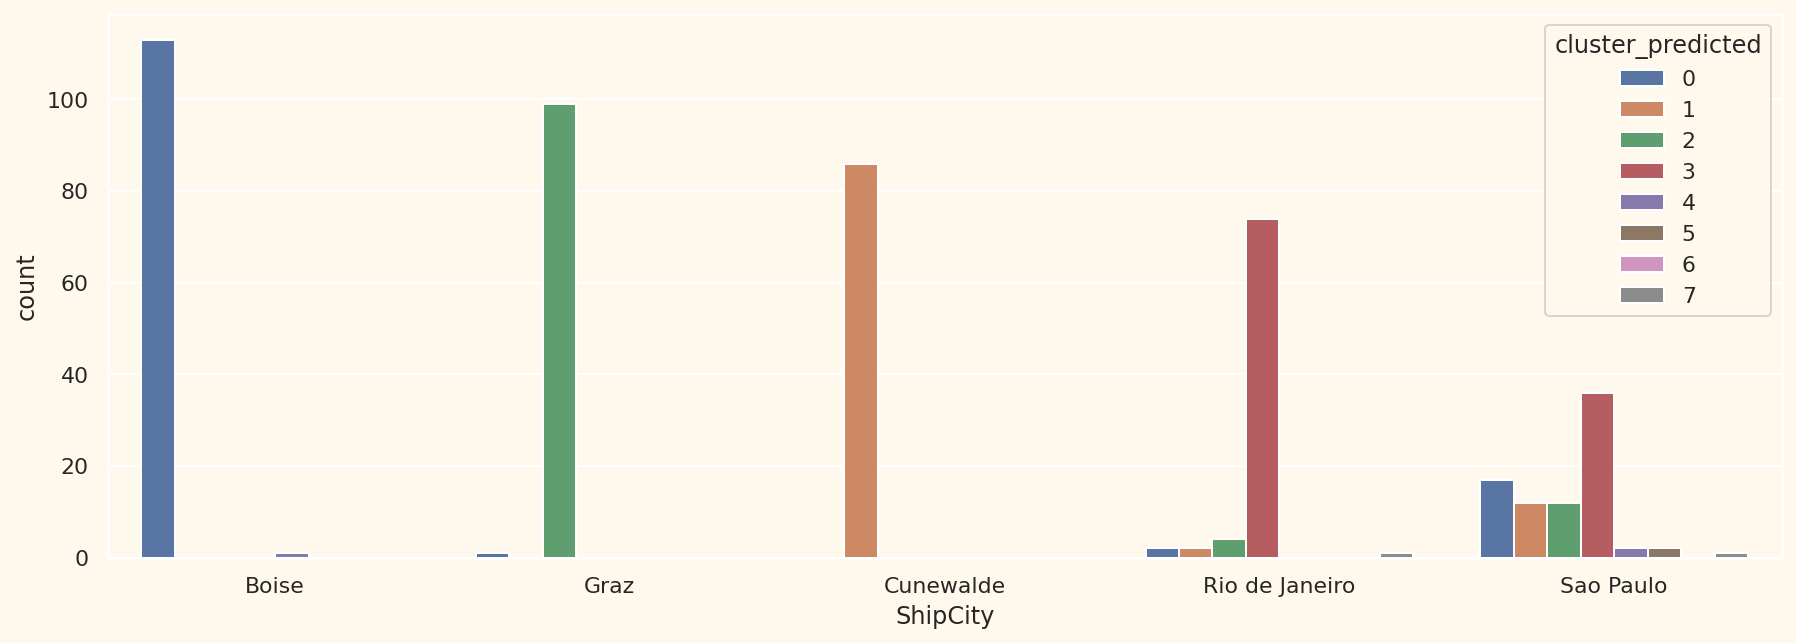

In [130]:
top_5_city = combinedDf['ShipCity'].value_counts().head(5).index
plt.subplots(figsize = (15,5))
ax=sns.countplot(x=combinedDf['ShipCity'],order=top_5_city,hue=combinedDf['cluster_predicted'])
plt.show()

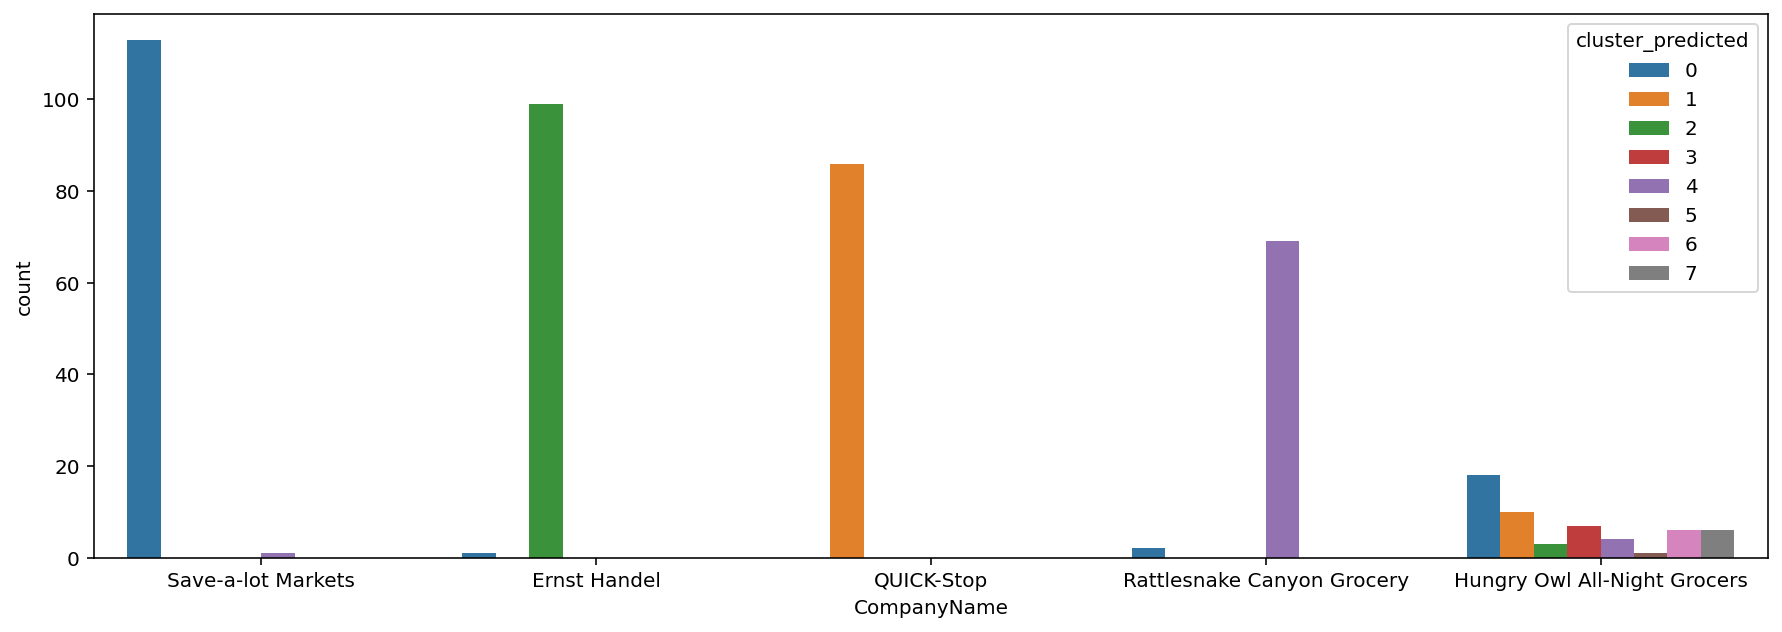

In [132]:
top_5_company = combinedDf['CompanyName'].value_counts().head(5).index
plt.subplots(figsize = (15,5))
ax=sns.countplot(x=combinedDf['CompanyName'],order=top_5_company,hue=combinedDf['cluster_predicted'])
plt.show()

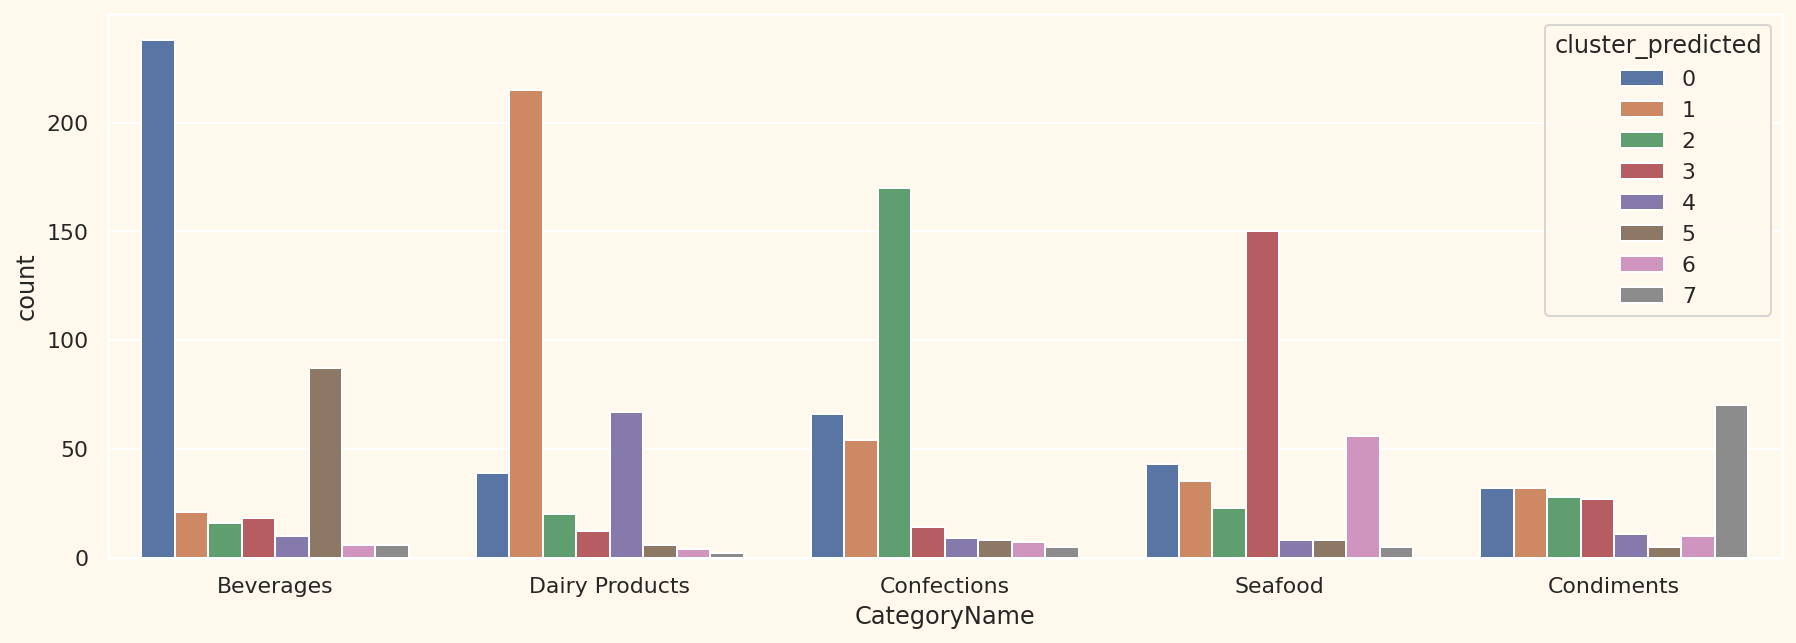

In [133]:
top_5_category = combinedDf['CategoryName'].value_counts().head(5).index
plt.subplots(figsize = (15,5))
ax=sns.countplot(x=combinedDf['CategoryName'],order=top_5_category,hue=combinedDf['cluster_predicted'])
plt.show()

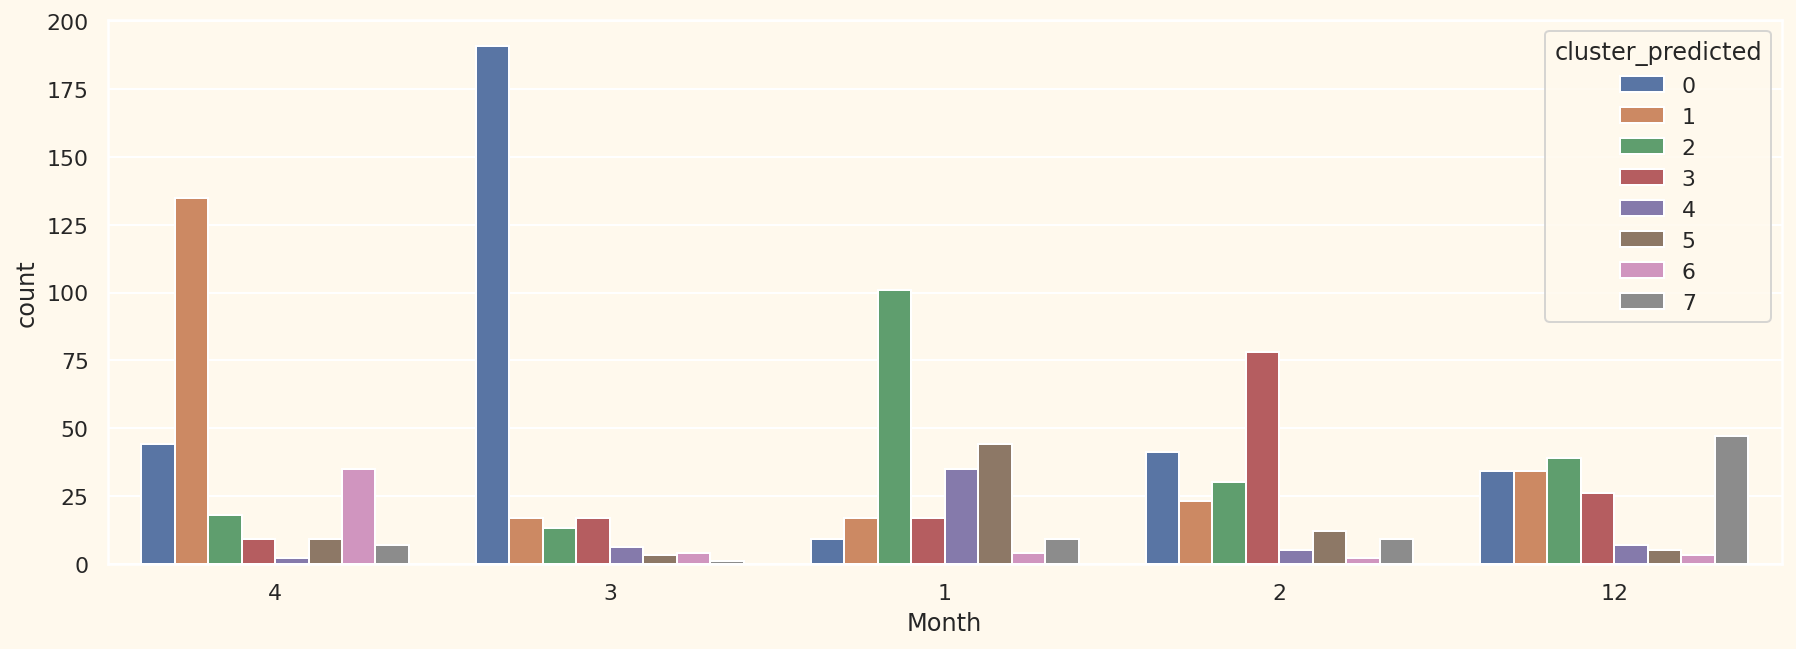

In [134]:
top_5_month = combinedDf['Month'].value_counts().head(5).index
plt.subplots(figsize = (15,5))
ax=sns.countplot(x=combinedDf['Month'],order=top_5_month,hue=combinedDf['cluster_predicted'])
plt.show()

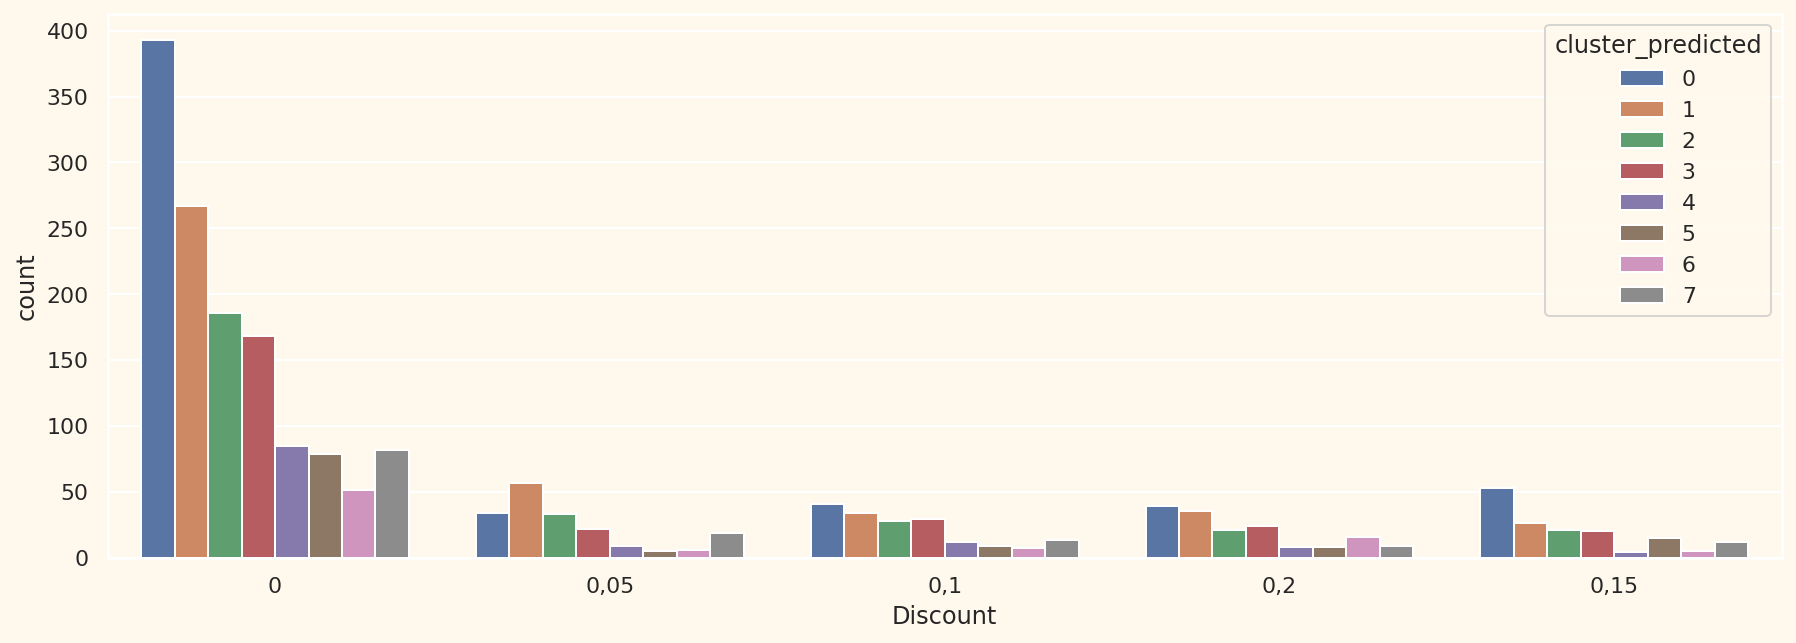

In [135]:
top_5_discount = combinedDf['Discount'].value_counts().head(5).index
plt.subplots(figsize = (15,5))
ax=sns.countplot(x=combinedDf['Discount'],order=top_5_discount,hue=combinedDf['cluster_predicted'])
plt.show()

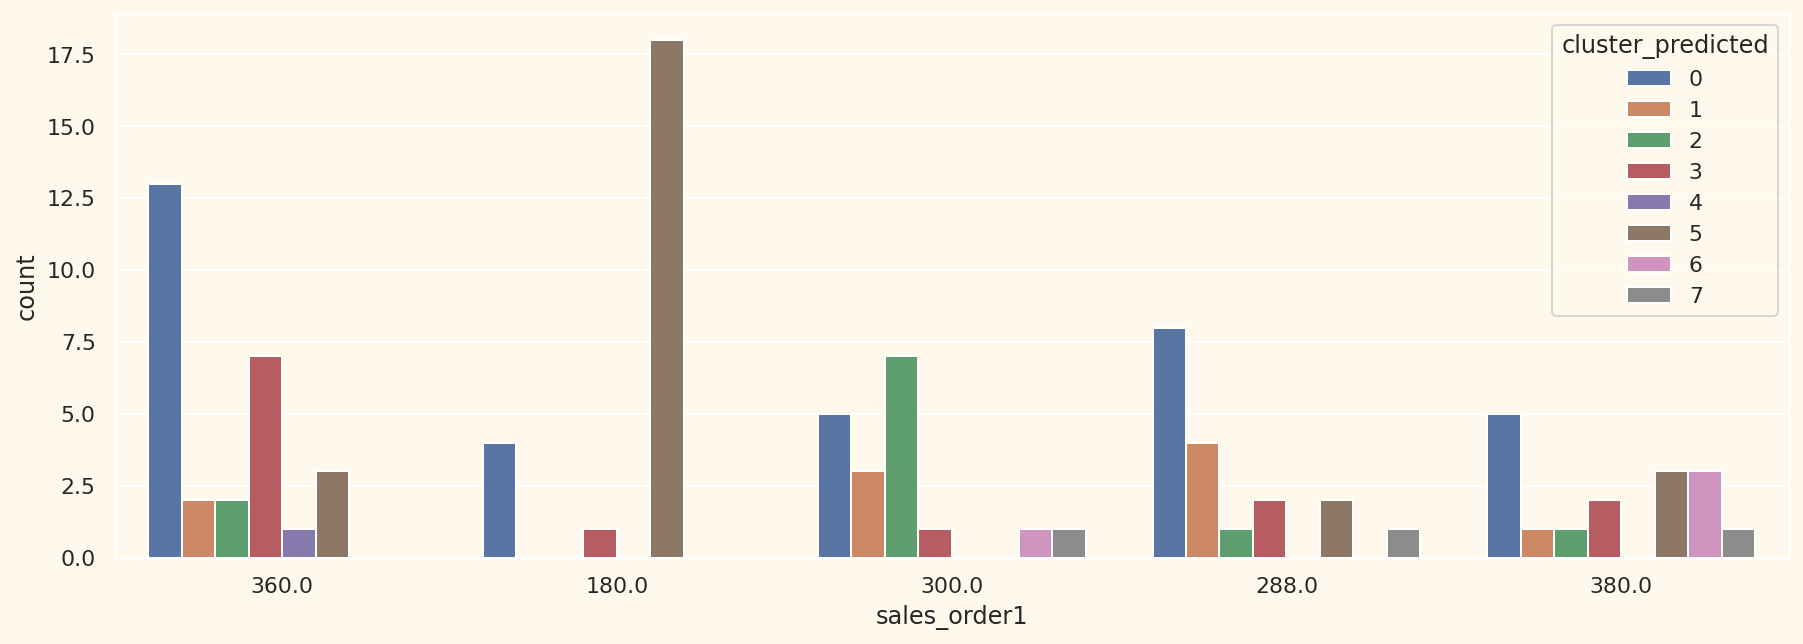

In [137]:
top_5_sales = combinedDf['sales_order1'].value_counts().head(5).index
plt.subplots(figsize = (15,5))
ax=sns.countplot(x=combinedDf['sales_order1'],order=top_5_sales,hue=combinedDf['cluster_predicted'])
plt.show()

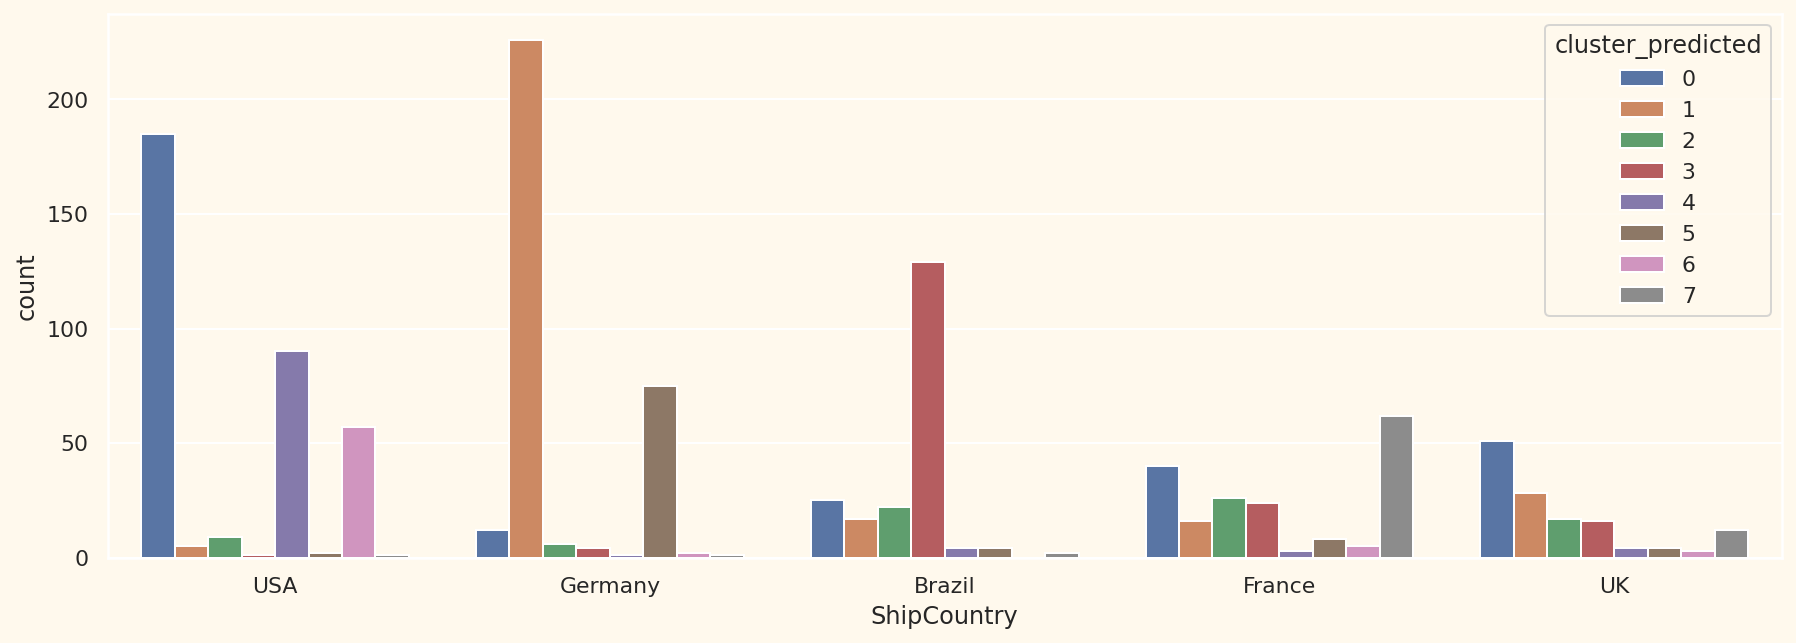

In [138]:
top_5_country = combinedDf['ShipCountry'].value_counts().head(5).index
plt.subplots(figsize = (15,5))
ax=sns.countplot(x=combinedDf['ShipCountry'],order=top_5_country,hue=combinedDf['cluster_predicted'])
plt.show()

In [131]:
cluster_0.sales_order1.describe()

count      601.000000
mean       634.211181
std       1028.268295
min         13.500000
25%        120.000000
50%        336.000000
75%        702.000000
max      10540.000000
Name: sales_order1, dtype: float64

Text(0, 0.5, 'salesorder')

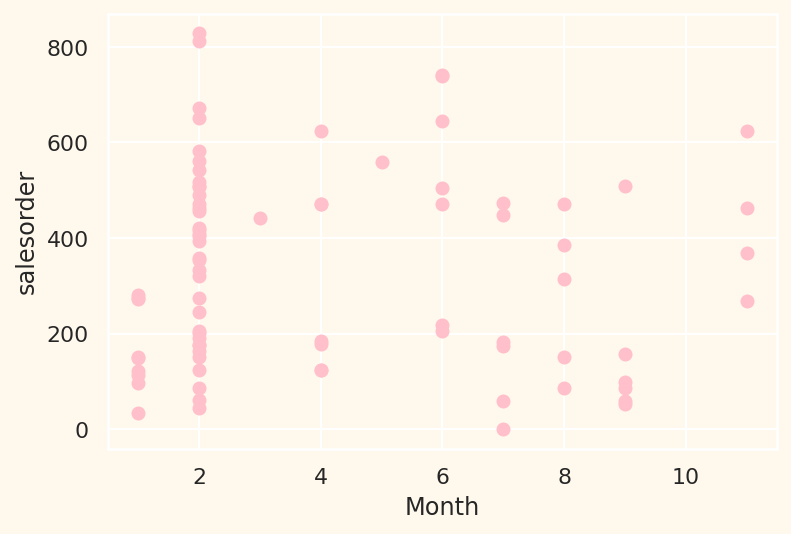

In [122]:
df_cluster
x = df_cluster['Month']
y = df_cluster['sales_order1']

colors = ['red', 'green', 'blue', 'yellow','black','purple','orange','pink']

for i in range(8):
  x_cluster = x[fitClusters_cao == i]
  y_cluster = y[fitClusters_cao == i]

plt.scatter(x_cluster,y_cluster, c=colors[i])

plt.xlabel('Month')
plt.ylabel('salesorder')

Text(0, 0.5, 'salesorder')

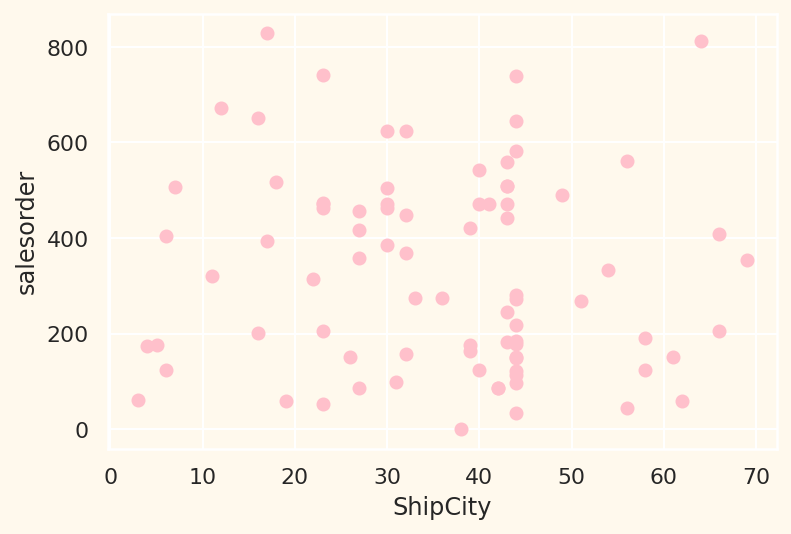

In [123]:
df_cluster
x = df_cluster['ShipCity']
y = df_cluster['sales_order1']

colors = ['red', 'green', 'blue', 'yellow','black','purple','orange','pink']

for i in range(8):
  x_cluster = x[fitClusters_cao == i]
  y_cluster = y[fitClusters_cao == i]

plt.scatter(x_cluster,y_cluster, c=colors[i])

plt.xlabel('ShipCity')
plt.ylabel('salesorder')